# **Pairing Analysis**

We start analysing the symmetry of the pairing with frequency and momentum for the different channels.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, display

from Pairing_Projection import Pairing_Projection, Pairing_Channel, Symmetric_Components, Get_Symmetry_Channel, Get_Total_Component
from MTI_Second_Order import FMTI2_NeumannBC, FMTI2_Relative_Coordinates, FMTI2_Wigner_Transform, Change_Basis

# labels for curves
Flabels = [["$f_{\\uparrow +, \\uparrow +}$", "$f_{\\uparrow +, \downarrow +}$", "$f_{\\uparrow +, \\uparrow -}$", "$f_{\\uparrow +, \downarrow -}$"],
          ["$f_{\downarrow +, \\uparrow +}$", "$f_{\downarrow +, \downarrow +}$", "$f_{\downarrow +, \\uparrow -}$", "$f_{\downarrow +, \downarrow -}$"],
          ["$f_{\\uparrow -, \\uparrow +}$", "$f_{\\uparrow -, \downarrow +}$", "$f_{\\uparrow -, \\uparrow -}$", "$f_{\\uparrow -, \downarrow -}$"],
          ["$f_{\downarrow -, \\uparrow +}$", "$f_{\downarrow -, \downarrow +}$", "$f_{\downarrow -, \\uparrow -}$", "$f_{\downarrow -, \downarrow -}$"]]

# colors for plotting
colors_real = ['brown', 'red', 'orange', 'gold']
# colors for plotting
colors_imag = ['blue','dodgerblue','lightskyblue','cyan']
# colors for plotting
colors_abs = ["#0077FF", "#00CC00", "#FFD700", "#FF2200"]

# labels for projection
label_sigma = {
    '11':   r"\ket{ \uparrow\uparrow }",
    '22':   r"\ket{ \downarrow\downarrow }",
    'sym':  r"\ket{\uparrow\downarrow} + \ket{\downarrow\uparrow}",
    'asym': r"\ket{\uparrow\downarrow} - \ket{\downarrow\uparrow}"
}

# labels for projection
label_lambda = {
    '11':   r"\ket{++}",
    '22':   r"\ket{--}",
    'sym':  r"\ket{+-} + \ket{-+}",
    'asym': r"\ket{+-} - \ket{-+}"
}

ratio_label = ['even $\omega$, even $k$',
              'even $\omega$, odd $k$',
              'odd $\omega$, even $k$',
              'odd $\omega$, odd $k$',]

### **Frequency and Momentum Symmetry**

We evaluate the symmetry of the pairing with respect to both frequency and momentum for a given selected channel in spin and orbital space.

In [2]:
# parameters
d = 100.; mu = 0.010; Delta = 0.005; L = 0.0; omega = 0.; Z0 = 1.; k = 0.; kx = 0.001; ky = 0.001
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])


# compute symmetrized components of pairing
symm_pair = Symmetric_Components(d=d, Z0=Z0, k=k, kx=k, ky=k, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19)

# define spin and orbital channel
spin='asym'; orbital='11'


symmetry = ['even frequency, even momentum',
           'even frequency, odd momentum',
           'odd frequency, even momentum',
           'odd frequency, odd momentum']
ratio = []
# loop over frequency symmetry
for freq in ['even','odd']:
    # loop over momentum symmetry
    for mom in ['even','odd']:
        
        # get total component for normalization
        f = Get_Total_Component(symm_pair, spin=spin, orbital=orbital)
        
        # get symmetry component
        f_sym = Get_Symmetry_Channel(symm_pair, frequency=freq, momentum=mom, spin=spin, orbital=orbital)

        # append to ratio array
        ratio.append(f_sym/f)

ratio = np.array(ratio)

# display the pairing channel
channel = rf"""
    \mathrm{{spin}}=\,{label_sigma[spin]}\,, 
    \quad
    \mathrm{{orbital}}={label_lambda[orbital]}
    """
display(Math(channel))

# print all symmetrized components for given channel 
for idx in range(4):
    print( symmetry[idx], ': ', round(abs(ratio[idx]),3) )

<IPython.core.display.Math object>

even frequency, even momentum :  1.0
even frequency, odd momentum :  0.0
odd frequency, even momentum :  0.0
odd frequency, odd momentum :  0.0


### **Spin Singlet $\ket{\uparrow\downarrow} - \ket{\downarrow\uparrow}$**

We start evaluating the symmetry of the spin singlet state $\ket{\uparrow\downarrow} - \ket{\downarrow\uparrow}$ with frequency and momentum.
For such a state there are 4 possible combinations with the orbital flavour.

#### <font color='green'> **Orbital Singlet $\ket{+-} - \ket{-+}$** </font> 
We consider here the antisymmetric orbital state $\ket{+-} - \ket{-+}$. The total state is *symmetric* since it is given by
$$
    \Lambda_A =
    \bigl( \ket{\uparrow\downarrow} - \ket{\downarrow\uparrow} \bigr) 
    \otimes
    \bigl( \ket{+-} - \ket{-+} \bigr) \,. 
$$

In [3]:
from tqdm.notebook import tqdm

# parameters
mu = 0.010; Delta = 0.005; omega = 0.0025; Z0 = 1.; k = 0.001; kx = 0.001; ky = 0.001
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# define spin and orbital channel
spin='asym'; orbital='asym'

# Zeeman values 
Zeeman = np.linspace(-0.050, 0.050, 100)

ratio_asym_asym = []

# loop over Zeeman
for idx in tqdm(range(len(Zeeman)), desc="Processing"):

    # Zeeman field
    L = Zeeman[idx]
    # ratio for each component
    r = []
    
    # compute symmetrized components of pairing
    symm_pair = Symmetric_Components(d=d, Z0=Z0, k=k, kx=k, ky=k, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19)
    
    # loop over frequency symmetry
    for freq in ['even','odd']:
        # loop over momentum symmetry
        for mom in ['even','odd']:
            
            # get total component for normalization
            f = Get_Total_Component(symm_pair, spin=spin, orbital=orbital)
            
            # get symmetry component
            f_sym = Get_Symmetry_Channel(symm_pair, frequency=freq, momentum=mom, spin=spin, orbital=orbital)
    
            # append to ratio array
            r.append(abs(f_sym/f))
    
    ratio_asym_asym.append(np.array(r))

ratio_asym_asym = np.array(ratio_asym_asym)
print(ratio_asym_asym.shape)

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

(100, 4)


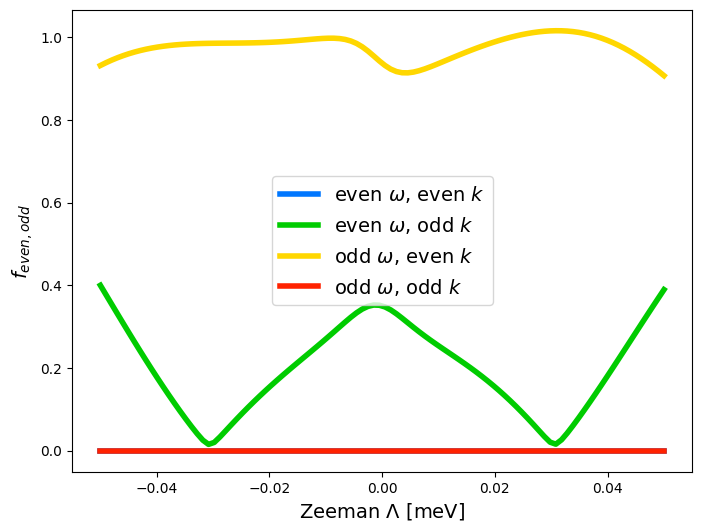

In [4]:
# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))

for idx in range(4):

    ax.plot(Zeeman, ratio_asym_asym[:,idx], c=colors_abs[idx], label=ratio_label[idx], lw=4)

ax.set_ylabel("$f_{even,odd}$", fontsize = 14)
ax.set_xlabel("Zeeman $\Lambda$ [meV]", fontsize = 14)
ax.legend(fontsize=14);

#### <font color='green'> **Orbital Triplet $\ket{+-} + \ket{-+}$** </font> 

We consider here the symmetric orbital state $\ket{+-} + \ket{-+}$. The total state is *antisymmetric* since it is given by
$$
    \Lambda_A =
    \bigl( \ket{\uparrow\downarrow} - \ket{\downarrow\uparrow} \bigr) 
    \otimes
    \bigl( \ket{+-} + \ket{-+} \bigr) \,. 
$$

In [6]:
# parameters
mu = 0.010; Delta = 0.005; omega = 0.0025; Z0 = 1.; k = 0.001; kx = 0.001; ky = 0.001
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# define spin and orbital channel
spin='asym'; orbital='sym'

# Zeeman values 
Zeeman = np.linspace(-0.050, 0.050, 100)

ratio_asym_sym = []

# loop over Zeeman
for idx in tqdm(range(len(Zeeman)), desc="Processing"):

    # Zeeman field
    L = Zeeman[idx]
    # ratio for each component
    r = []
    
    # compute symmetrized components of pairing
    symm_pair = Symmetric_Components(d=d, Z0=Z0, k=k, kx=k, ky=k, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19)
    
    # loop over frequency symmetry
    for freq in ['even','odd']:
        # loop over momentum symmetry
        for mom in ['even','odd']:
            
            # get total component for normalization
            f = Get_Total_Component(symm_pair, spin=spin, orbital=orbital)
            
            # get symmetry component
            f_sym = Get_Symmetry_Channel(symm_pair, frequency=freq, momentum=mom, spin=spin, orbital=orbital)
    
            # append to ratio array
            r.append(abs(f_sym/f))
    
    ratio_asym_sym.append(np.array(r))

ratio_asym_sym = np.array(ratio_asym_sym)
print(ratio_asym_sym.shape)

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

(100, 4)


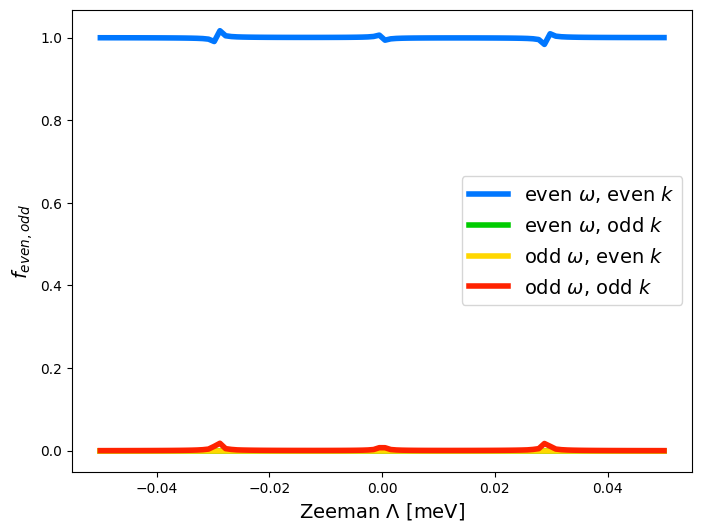

In [7]:
# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))

for idx in range(4):

    ax.plot(Zeeman, ratio_asym_sym[:,idx], c=colors_abs[idx], label=ratio_label[idx], lw=4)

ax.set_ylabel("$f_{even,odd}$", fontsize = 14)
ax.set_xlabel("Zeeman $\Lambda$ [meV]", fontsize = 14)
ax.legend(fontsize=14);

#### <font color='green'> **Orbital Triplet $\ket{++}$** </font> 

We consider here the symmetric orbital state $\ket{++}$. The total state is *antisymmetric* since it is given by
$$
    \Lambda_A =
    \bigl( \ket{\uparrow\downarrow} - \ket{\downarrow\uparrow} \bigr) 
    \otimes
    \ket{++} \,. 
$$

In [12]:
# parameters
mu = 0.010; Delta = 0.005; omega = 0.0025; Z0 = 1.; k = 0.001; kx = 0.001; ky = 0.001
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# define spin and orbital channel
spin='asym'; orbital='11'

# Zeeman values 
Zeeman = np.linspace(-0.050, 0.050, 100)

ratio_asym_11 = []

# loop over Zeeman
for idx in tqdm(range(len(Zeeman)), desc="Processing"):

    # Zeeman field
    L = Zeeman[idx]
    # ratio for each component
    r = []
    
    # compute symmetrized components of pairing
    symm_pair = Symmetric_Components(d=d, Z0=Z0, k=k, kx=k, ky=k, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19)
    
    # loop over frequency symmetry
    for freq in ['even','odd']:
        # loop over momentum symmetry
        for mom in ['even','odd']:
            
            # get total component for normalization
            f = Get_Total_Component(symm_pair, spin=spin, orbital=orbital)
            
            # get symmetry component
            f_sym = Get_Symmetry_Channel(symm_pair, frequency=freq, momentum=mom, spin=spin, orbital=orbital)
    
            # append to ratio array
            r.append(abs(f_sym/f))
    
    ratio_asym_11.append(np.array(r))

ratio_asym_11 = np.array(ratio_asym_11)
print(ratio_asym_11.shape)

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

(100, 4)


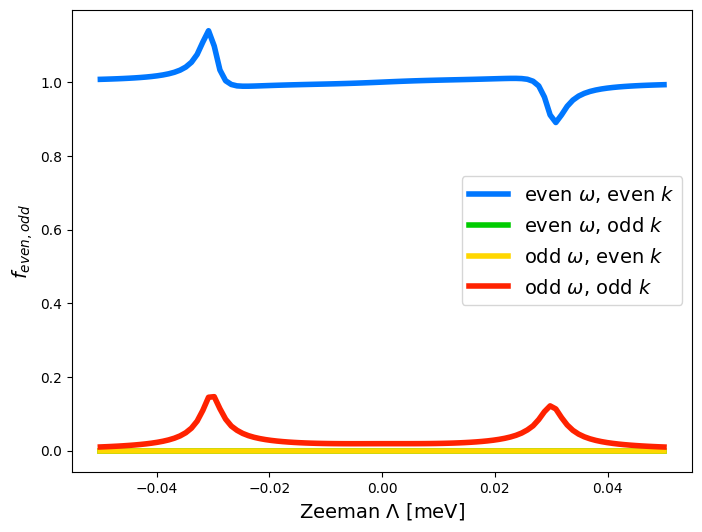

In [13]:
# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))

for idx in range(4):

    ax.plot(Zeeman, ratio_asym_11[:,idx], c=colors_abs[idx], label=ratio_label[idx], lw=4)

ax.set_ylabel("$f_{even,odd}$", fontsize = 14)
ax.set_xlabel("Zeeman $\Lambda$ [meV]", fontsize = 14)
ax.legend(fontsize=14);

#### <font color='green'> **Orbital Triplet $\ket{--}$** </font> 

We consider here the symmetric orbital state $\ket{--}$. The total state is *antisymmetric* since it is given by
$$
    \Lambda_A =
    \bigl( \ket{\uparrow\downarrow} - \ket{\downarrow\uparrow} \bigr) 
    \otimes
    \ket{--} \,. 
$$

In [19]:
# parameters
mu = 0.010; Delta = 0.005; omega = 0.0025; Z0 = 1.; k = 0.001; kx = 0.001; ky = 0.001
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# define spin and orbital channel
spin='asym'; orbital='11'

# Zeeman values 
Zeeman = np.linspace(-0.050, 0.050, 100)

ratio_asym_22 = []

# loop over Zeeman
for idx in tqdm(range(len(Zeeman)), desc="Processing"):

    # Zeeman field
    L = Zeeman[idx]
    # ratio for each component
    r = []
    
    # compute symmetrized components of pairing
    symm_pair = Symmetric_Components(d=d, Z0=Z0, k=k, kx=k, ky=k, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19)
    
    # loop over frequency symmetry
    for freq in ['even','odd']:
        # loop over momentum symmetry
        for mom in ['even','odd']:
            
            # get total component for normalization
            f = Get_Total_Component(symm_pair, spin=spin, orbital=orbital)
            
            # get symmetry component
            f_sym = Get_Symmetry_Channel(symm_pair, frequency=freq, momentum=mom, spin=spin, orbital=orbital)
    
            # append to ratio array
            r.append(abs(f_sym/f))
    
    ratio_asym_22.append(np.array(r))

ratio_asym_22 = np.array(ratio_asym_22)
print(ratio_asym_22.shape)

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

(100, 4)


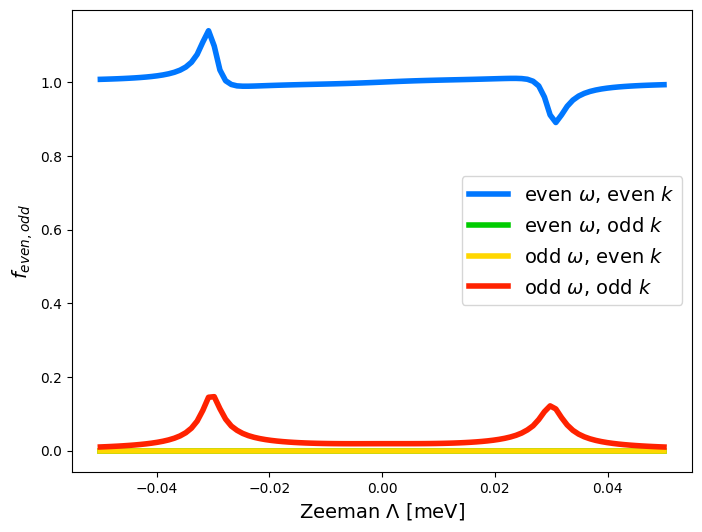

In [20]:
# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))

for idx in range(4):

    ax.plot(Zeeman, ratio_asym_11[:,idx], c=colors_abs[idx], label=ratio_label[idx], lw=4)

ax.set_ylabel("$f_{even,odd}$", fontsize = 14)
ax.set_xlabel("Zeeman $\Lambda$ [meV]", fontsize = 14)
ax.legend(fontsize=14);

### **Spin Triplet $\ket{\uparrow\downarrow} + \ket{\downarrow\uparrow}$**

We start evaluating the symmetry of the spin singlet state $\ket{\uparrow\downarrow} + \ket{\downarrow\uparrow}$ with frequency and momentum.
For such a state there are 4 possible combinations with the orbital flavour.

#### <font color='green'> **Orbital Singlet $\ket{+-} - \ket{-+}$** </font> 
We consider here the antisymmetric orbital state $\ket{+-} - \ket{-+}$. The total state is *antisymmetric* since it is given by
$$
    \Lambda_A =
    \bigl( \ket{\uparrow\downarrow} + \ket{\downarrow\uparrow} \bigr) 
    \otimes
    \bigl( \ket{+-} - \ket{-+} \bigr) \,. 
$$

In [21]:
# parameters
mu = 0.010; Delta = 0.005; omega = 0.0025; Z0 = 1.; k = 0.001; kx = 0.001; ky = 0.001
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# define spin and orbital channel
spin='sym'; orbital='asym'

# Zeeman values 
Zeeman = np.linspace(-0.050, 0.050, 100)

ratio_sym_asym = []

# loop over Zeeman
for idx in tqdm(range(len(Zeeman)), desc="Processing"):

    # Zeeman field
    L = Zeeman[idx]
    # ratio for each component
    r = []
    
    # compute symmetrized components of pairing
    symm_pair = Symmetric_Components(d=d, Z0=Z0, k=k, kx=k, ky=k, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19)
    
    # loop over frequency symmetry
    for freq in ['even','odd']:
        # loop over momentum symmetry
        for mom in ['even','odd']:
            
            # get total component for normalization
            f = Get_Total_Component(symm_pair, spin=spin, orbital=orbital)
            
            # get symmetry component
            f_sym = Get_Symmetry_Channel(symm_pair, frequency=freq, momentum=mom, spin=spin, orbital=orbital)
    
            # append to ratio array
            r.append(abs(f_sym/f))
    
    ratio_sym_asym.append(np.array(r))

ratio_sym_asym = np.array(ratio_sym_asym)
print(ratio_sym_asym.shape)

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

(100, 4)


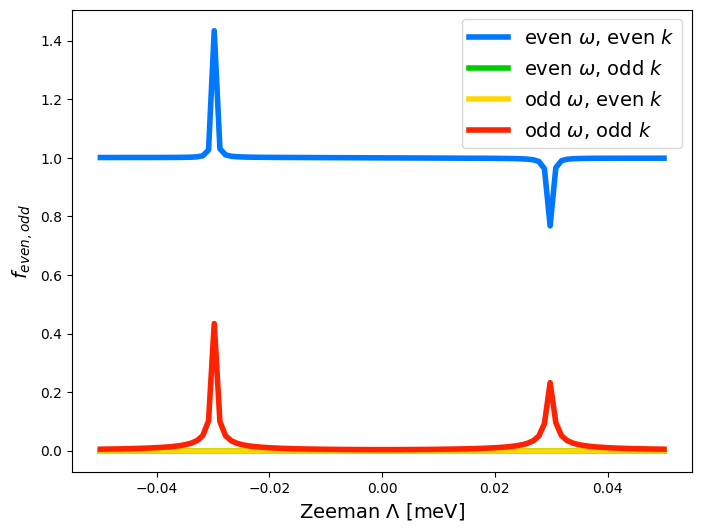

In [25]:
# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))

for idx in range(4):

    ax.plot(Zeeman, ratio_sym_asym[:,idx], c=colors_abs[idx], label=ratio_label[idx], lw=4)

ax.set_ylabel("$f_{even,odd}$", fontsize = 14)
ax.set_xlabel("Zeeman $\Lambda$ [meV]", fontsize = 14)
ax.legend(fontsize=14);

#### <font color='green'> **Orbital Triplet $\ket{+-} + \ket{-+}$** </font> 
We consider here the symmetric orbital state $\ket{+-} + \ket{-+}$. The total state is *symmetric* since it is given by
$$
    \Lambda_A =
    \bigl( \ket{\uparrow\downarrow} + \ket{\downarrow\uparrow} \bigr) 
    \otimes
    \bigl( \ket{+-} + \ket{-+} \bigr) \,. 
$$

In [24]:
# parameters
mu = 0.010; Delta = 0.005; omega = 0.0025; Z0 = 1.; k = 0.001; kx = 0.001; ky = 0.001
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# define spin and orbital channel
spin='sym'; orbital='sym'

# Zeeman values 
Zeeman = np.linspace(-0.050, 0.050, 100)

ratio_sym_sym = []

# loop over Zeeman
for idx in tqdm(range(len(Zeeman)), desc="Processing"):

    # Zeeman field
    L = Zeeman[idx]
    # ratio for each component
    r = []
    
    # compute symmetrized components of pairing
    symm_pair = Symmetric_Components(d=d, Z0=Z0, k=k, kx=k, ky=k, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19)
    
    # loop over frequency symmetry
    for freq in ['even','odd']:
        # loop over momentum symmetry
        for mom in ['even','odd']:
            
            # get total component for normalization
            f = Get_Total_Component(symm_pair, spin=spin, orbital=orbital)
            
            # get symmetry component
            f_sym = Get_Symmetry_Channel(symm_pair, frequency=freq, momentum=mom, spin=spin, orbital=orbital)
    
            # append to ratio array
            r.append(abs(f_sym/f))
    
    ratio_sym_sym.append(np.array(r))

ratio_sym_sym = np.array(ratio_sym_sym)
print(ratio_sym_sym.shape)

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

(100, 4)


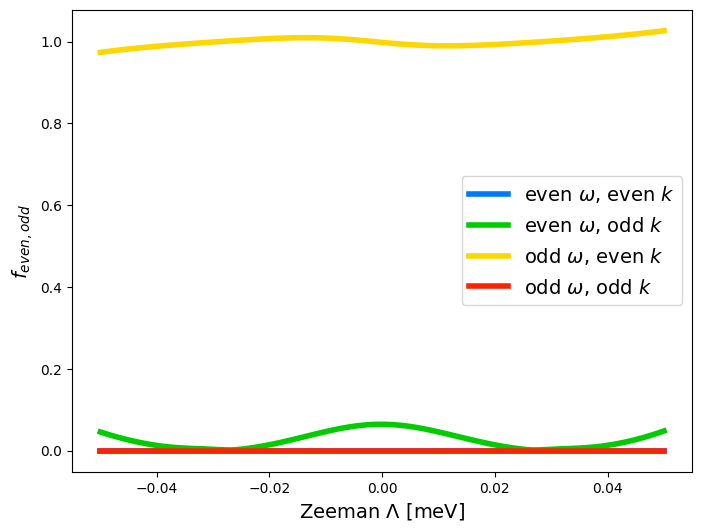

In [26]:
# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))

for idx in range(4):

    ax.plot(Zeeman, ratio_sym_sym[:,idx], c=colors_abs[idx], label=ratio_label[idx], lw=4)

ax.set_ylabel("$f_{even,odd}$", fontsize = 14)
ax.set_xlabel("Zeeman $\Lambda$ [meV]", fontsize = 14)
ax.legend(fontsize=14);

#### <font color='green'> **Orbital Triplet $\ket{++}$** </font> 
We consider here the symmetric orbital state $\ket{++}$. The total state is *symmetric* since it is given by
$$
    \Lambda_A =
    \bigl( \ket{\uparrow\downarrow} + \ket{\downarrow\uparrow} \bigr) 
    \otimes
    \bigl( \ket{++} \bigr) \,. 
$$

In [27]:
# parameters
mu = 0.010; Delta = 0.005; omega = 0.0025; Z0 = 1.; k = 0.001; kx = 0.001; ky = 0.001
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# define spin and orbital channel
spin='sym'; orbital='11'

# Zeeman values 
Zeeman = np.linspace(-0.050, 0.050, 100)

ratio_sym_11 = []

# loop over Zeeman
for idx in tqdm(range(len(Zeeman)), desc="Processing"):

    # Zeeman field
    L = Zeeman[idx]
    # ratio for each component
    r = []
    
    # compute symmetrized components of pairing
    symm_pair = Symmetric_Components(d=d, Z0=Z0, k=k, kx=k, ky=k, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19)
    
    # loop over frequency symmetry
    for freq in ['even','odd']:
        # loop over momentum symmetry
        for mom in ['even','odd']:
            
            # get total component for normalization
            f = Get_Total_Component(symm_pair, spin=spin, orbital=orbital)
            
            # get symmetry component
            f_sym = Get_Symmetry_Channel(symm_pair, frequency=freq, momentum=mom, spin=spin, orbital=orbital)
    
            # append to ratio array
            r.append(abs(f_sym/f))
    
    ratio_sym_11.append(np.array(r))

ratio_sym_11 = np.array(ratio_sym_11)
print(ratio_sym_11.shape)

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

(100, 4)


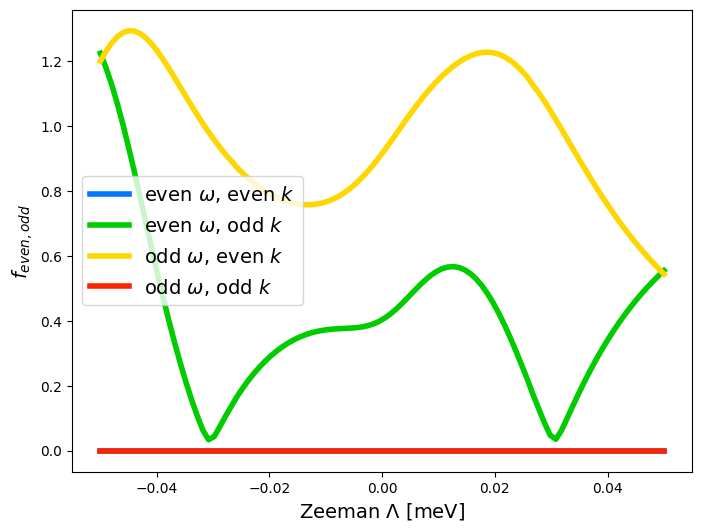

In [28]:
# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))

for idx in range(4):

    ax.plot(Zeeman, ratio_sym_11[:,idx], c=colors_abs[idx], label=ratio_label[idx], lw=4)

ax.set_ylabel("$f_{even,odd}$", fontsize = 14)
ax.set_xlabel("Zeeman $\Lambda$ [meV]", fontsize = 14)
ax.legend(fontsize=14);

#### <font color='green'> **Orbital Triplet $\ket{--}$** </font> 
We consider here the symmetric orbital state $\ket{--}$. The total state is *symmetric* since it is given by
$$
    \Lambda_A =
    \bigl( \ket{\uparrow\downarrow} + \ket{\downarrow\uparrow} \bigr) 
    \otimes
    \bigl( \ket{--} \bigr) \,. 
$$

In [46]:
# parameters
mu = 0.010; Delta = 0.005; omega = 0.0025; Z0 = 1.; k = 0.002; kx = 0.001; ky = 0.001
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# define spin and orbital channel
spin='sym'; orbital='22'

# Zeeman values 
Zeeman = np.linspace(-0.050, 0.050, 100)

ratio_sym_22 = []

# loop over Zeeman
for idx in tqdm(range(len(Zeeman)), desc="Processing"):

    # Zeeman field
    L = Zeeman[idx]
    # ratio for each component
    r = []
    
    # compute symmetrized components of pairing
    symm_pair = Symmetric_Components(d=d, Z0=Z0, k=k, kx=k, ky=k, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19)
    
    # loop over frequency symmetry
    for freq in ['even','odd']:
        # loop over momentum symmetry
        for mom in ['even','odd']:
            
            # get total component for normalization
            f = Get_Total_Component(symm_pair, spin=spin, orbital=orbital)
            
            # get symmetry component
            f_sym = Get_Symmetry_Channel(symm_pair, frequency=freq, momentum=mom, spin=spin, orbital=orbital)
    
            # append to ratio array
            r.append(abs(f_sym/f))
    
    ratio_sym_22.append(np.array(r))

ratio_sym_22 = np.array(ratio_sym_22)
print(ratio_sym_22.shape)

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

(100, 4)


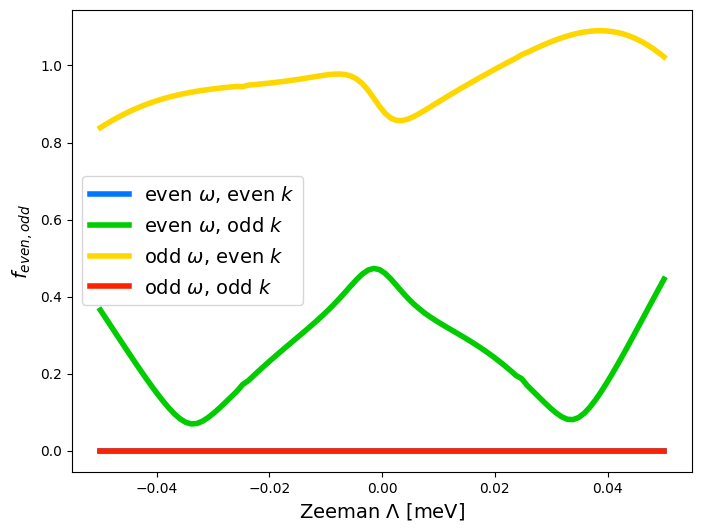

In [47]:
# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))

for idx in range(4):

    ax.plot(Zeeman, ratio_sym_22[:,idx], c=colors_abs[idx], label=ratio_label[idx], lw=4)

ax.set_ylabel("$f_{even,odd}$", fontsize = 14)
ax.set_xlabel("Zeeman $\Lambda$ [meV]", fontsize = 14)
ax.legend(fontsize=14);